# Stock Market Prediction And Forecasting Using Stacked LSTM(Long Short Term Memory)
## LGMVIP - Data Science Task2
## Submitted By- Chanukya Sai



### Importing all required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from sklearn.preprocessing import MinMaxScaler


In [2]:

from keras.models import Sequential
from keras.layers import Dense, LSTM

### Importing Raw data from given URL

In [69]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [25]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


Open- Opening Price of Stock on a certain day  
Close- Closing Price of Stock on a certain day ( vital for our task)  
High- Highest Price of Stock on a certain day  
Low- Lowest Price of Stock on a certain day  

### Converting Date from str to Datetime

In [26]:
df['Date']=pd.to_datetime(df['Date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [28]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [29]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### Data has no NULL values

In [30]:
data={'Year':df.Date.dt.year.to_list(),'Month':df.Date.dt.month.to_list(),'Day':df.Date.dt.day.to_list()}

yr_month_date=pd.DataFrame(data)
yr_month_date.iloc[:,::-1]

,Day,Month,Year
0,28,9,2018
1,27,9,2018
2,26,9,2018
3,25,9,2018
4,24,9,2018
...,...,...,...
2030,27,7,2010
2031,26,7,2010
2032,23,7,2010
2033,22,7,2010


### Splitting Date into year,month,day if we need it later

In [31]:
df=df.sort_values(by=['Date'],inplace=False,ascending=True)

In [32]:
df.reset_index(drop=True,inplace=True)

In [34]:
df.index=df.Date


In [37]:
df.drop(['Date'],axis=1,inplace=True)

#### -Sorted data based on Date (ascending)
#### -Set index of data frame as Date
#### - Dropped date column

## Visualizing all featues [Open,Close,High,Low] trend over the Date

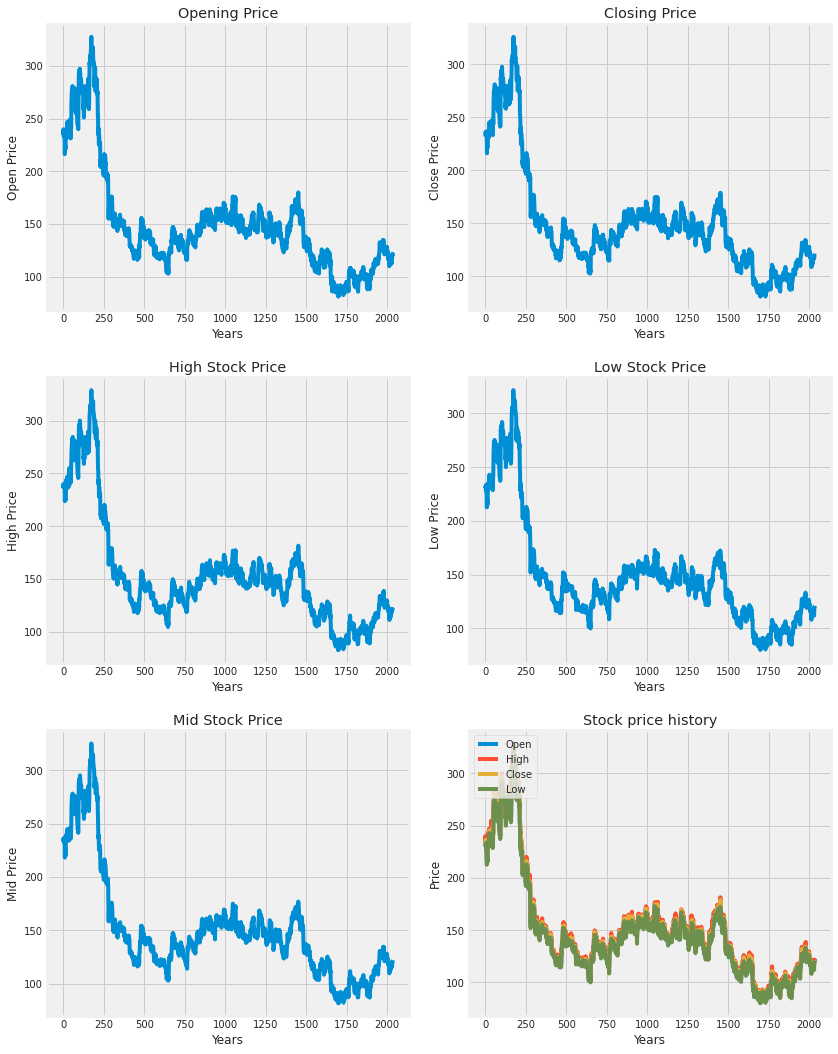

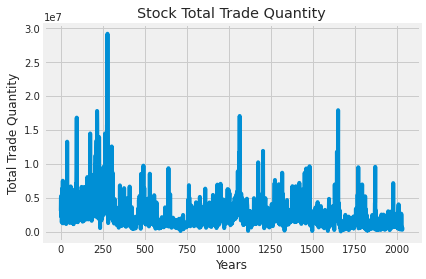

In [70]:
fig,axs=plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(12)
axs[0,0].plot(df['Open'])
axs[0,0].set_ylabel('Open Price')
axs[0,0].set_xlabel('Years')
axs[0,0].set_title('Opening Price')

axs[0,1].plot(df['Close'])
axs[0,1].set_ylabel('Close Price')
axs[0,1].set_xlabel('Years')
axs[0,1].set_title('Closing Price')

axs[1,0].plot(df['High'])
axs[1,0].set_ylabel('High Price')
axs[1,0].set_xlabel('Years')
axs[1,0].set_title('High Stock Price')

axs[1,1].plot(df['Low'])
axs[1,1].set_ylabel('Low Price')
axs[1,1].set_xlabel('Years')
axs[1,1].set_title('Low Stock Price')


axs[2,0].plot((df["High"]+df['Low'])/2)
axs[2,0].set_ylabel('Mid Price')
axs[2,0].set_xlabel('Years')
axs[2,0].set_title('Mid Stock Price')

axs[2,1].plot(df['Open'])
axs[2,1].plot(df['High'])
axs[2,1].plot(df['Close'])
axs[2,1].plot(df['Low'])
axs[2,1].set_title('Stock price history')
axs[2,1].set_ylabel('Price')
axs[2,1].set_xlabel('Years')
axs[2,1].legend(['Open','High','Close','Low'],loc='upper left')

plt.figure()
plt.plot(df["Total Trade Quantity"])
plt.title('Stock Total Trade Quantity')
plt.ylabel('Total Trade Quantity')
plt.xlabel('Years')
                    
fig.tight_layout(pad=2)
plt.show()

In [41]:
df.columns=['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover-Lakhs']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2010-07-21 to 2018-09-28
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover-Lakhs        2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 207.2 KB


### Visualizing Total Trade and Turnover with Moving Average

In [43]:
moving_average=[2,5,10,20]

for ma in moving_average:
     name=f'Trade Moving_Avg-{ma} days'
     df[name]=df['Total Trade Quantity'].rolling(window=ma).mean()

for ma in moving_average:
    name=f'Turnover Moving_Avg-{ma} days in Lks'
    df[name]=df['Turnover-Lakhs'].rolling(window=ma).mean()



In [47]:
df.columns=['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
            'Trade Moving_Avg-2 days', 'Trade Moving_Avg-5 days',
       'Trade Moving_Avg-10 days', 'Trade Moving_Avg-20 days',
       'Turnover-Lakhs', 
       'Turnover Moving_Avg-2 days in Lks',
       'Turnover Moving_Avg-5 days in Lks',
       'Turnover Moving_Avg-10 days in Lks',
       'Turnover Moving_Avg-20 days in Lks']

In [48]:
df=df.fillna(0)

In [ ]:
df.head()

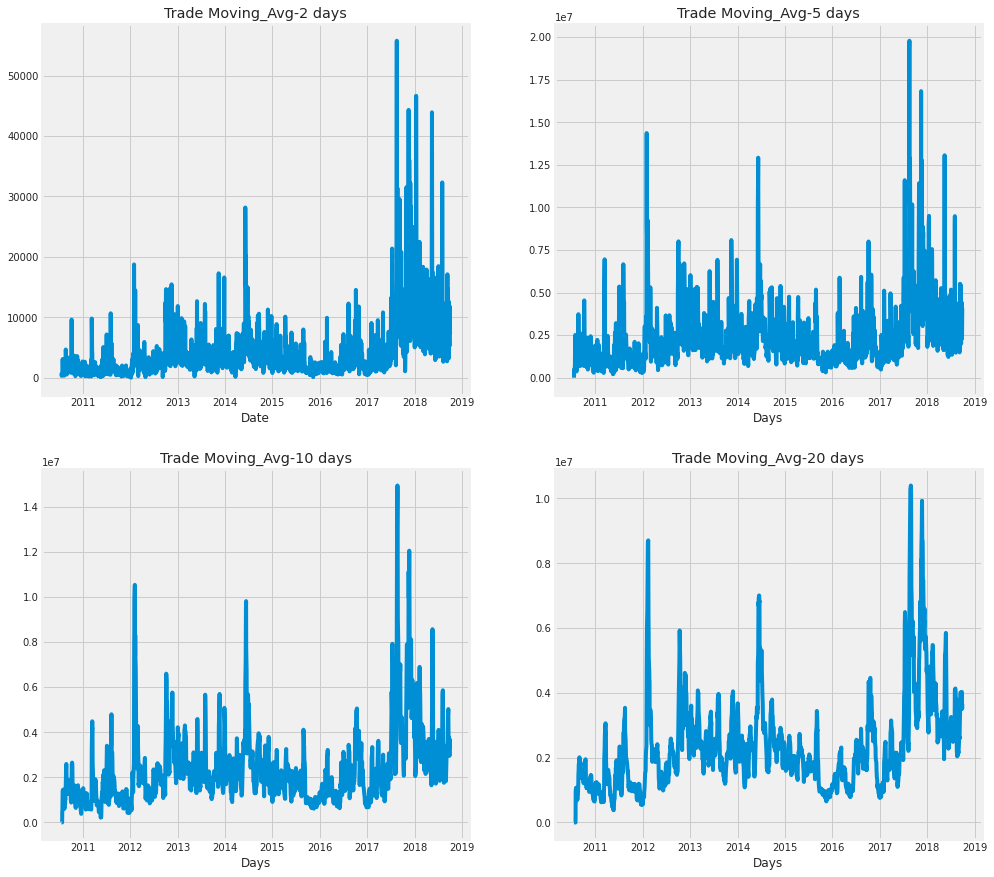

In [50]:
fig,axs=plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0,0].plot(df['Trade Moving_Avg-2 days'])
axs[0,0].set_xlabel('Date')
axs[0,0].set_title('Trade Moving_Avg-2 days')

axs[0,1].plot(df['Trade Moving_Avg-5 days'])
axs[0,1].set_xlabel('Days')
axs[0,1].set_title('Trade Moving_Avg-5 days')

axs[1,0].plot(df['Trade Moving_Avg-10 days'])
axs[1,0].set_xlabel('Days')
axs[1,0].set_title('Trade Moving_Avg-10 days')

axs[1,1].plot(df['Trade Moving_Avg-20 days'])
axs[1,1].set_xlabel('Days')
axs[1,1].set_title('Trade Moving_Avg-20 days')

plt.show()

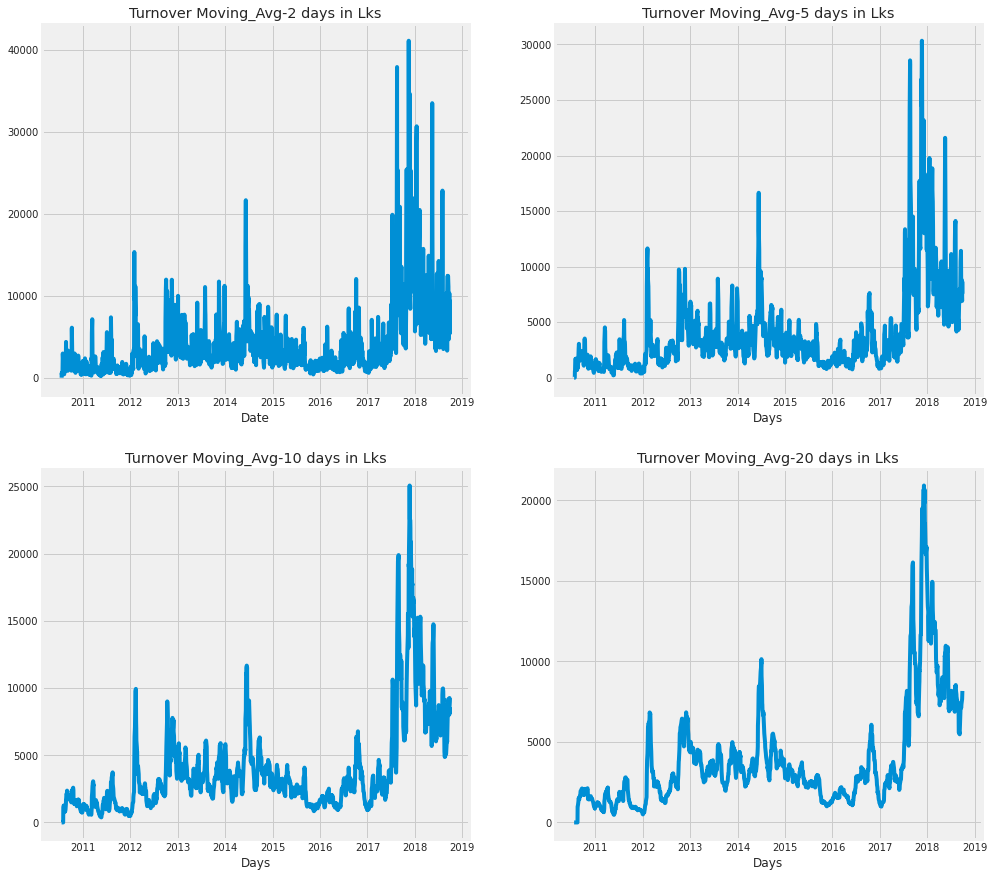

In [51]:
fig,axs=plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0,0].plot(df['Turnover Moving_Avg-2 days in Lks'])
axs[0,0].set_xlabel('Date')
axs[0,0].set_title('Turnover Moving_Avg-2 days in Lks')

axs[0,1].plot(df['Turnover Moving_Avg-5 days in Lks'])
axs[0,1].set_xlabel('Days')
axs[0,1].set_title('Turnover Moving_Avg-5 days in Lks')

axs[1,0].plot(df['Turnover Moving_Avg-10 days in Lks'])
axs[1,0].set_xlabel('Days')
axs[1,0].set_title('Turnover Moving_Avg-10 days in Lks')

axs[1,1].plot(df['Turnover Moving_Avg-20 days in Lks'])
axs[1,1].set_xlabel('Days')
axs[1,1].set_title('Turnover Moving_Avg-20 days in Lks')

plt.show()

## Scaling the data and ModelBuilding

In [22]:
scaler=MinMaxScaler(feature_range=(0,1))



In [57]:
data=df['Close'].to_frame()
dataset=data.values

In [58]:
training_data_len = int(np.ceil( len(dataset) * .65 ))

training_data_len

1323

In [59]:
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Creating Train data and Test data

In [60]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
       0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
       0.14522059, 0.13521242, 0.12724673, 0.13031046, 0.12806373,
       0.13459967, 0.12908497, 0.13562092, 0.12377451, 0.1190768 ,
       0.11397059, 0.13112745, 0.12479575, 0.14603758, 0.14501634,
       0.14726307, 0.15196078, 0.1503268 , 0.14971405, 0.16156046,
       0.17177288, 0.1693219 , 0.16830065, 0.17238562, 0.19097222,
       0.18913399, 0.19138072, 0.18382353, 0.17544935, 0.17279412,
       0.16830065, 0.17034314, 0.17810458, 0.16973039, 0.16278595,
       0.17401961, 0.18035131, 0.17422386, 0.17116013, 0.16564542,
       0.16033497, 0.17381536, 0.17851307, 0.18811275, 0.19750817,
       0.21425654, 0.21098856, 0.21772876, 0.20445261, 0.21568627])]
[0.21282679738562094]

[array([0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
       0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
       0.14522059, 0.13521242, 0.12

# LSTM Model

In [61]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1263/1263 [==============================] - 54s 29ms/step - loss: 0.0017


#### Testing Data

In [62]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

#### Converting Data to ndarray

In [63]:


# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


#### Prediction

In [64]:


# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


### Finding Root mean Squared Error

In [65]:


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9.272508151039277

### Plot of Predicted data over actual data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


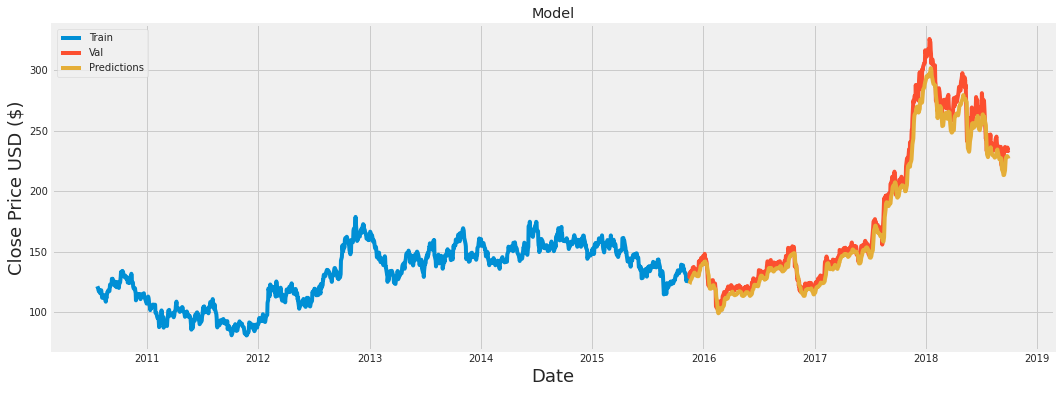

In [68]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

#### Actual Closing Price vs Predicted Closing Price


In [67]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2015-11-16,128.15,123.496750
2015-11-17,132.50,123.885010
2015-11-18,128.75,125.316040
2015-11-19,130.90,125.957970
2015-11-20,133.80,126.617836
...,...,...
2018-09-24,233.30,229.098526
2018-09-25,236.10,228.689743
2018-09-26,234.25,228.519836
